### Purpose of this notebook: Develop algorithms to procedurally generate block construction targets 

* blockworld is 8x8 grid
* allowable blocks are: 1x1, 2x2, 4x4 squares and the triangles that comprise them
* target difficulty roughly varies according to shape and number of holes
* constraints on construction include: 
    * physical stability (a tipped over triangle will fall!)
    * geometry (presence & shape of "holes")
    * inventory (not infinite number of large 8x2 blocks!)
    * cost (# blocks)

In [2]:
from __future__ import division

import numpy as np
from PIL import Image

from matplotlib import pylab, mlab, pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

from IPython.core.pylabtools import figsize, getfigs

import seaborn as sns

from scipy.stats import norm
from IPython.display import clear_output

## custom helper modules
import separation_axis_theorem as sat
import blockworld_helpers as utils

## TODO: convert to python3

### start with simple cases 

#### define inventory of block types, positioned at origin

In [5]:
## block primitives

#### squares
s1 = np.array([(0, 0), (0, -1), (1, -1), (1, 0), (0,0)]) ## 1x1
s2 = s1*2 ## 2x2
s4 = s1*4 ## 4x4

array([[ 0,  0],
       [ 0, -4],
       [ 4, -4],
       [ 4,  0],
       [ 0,  0]])

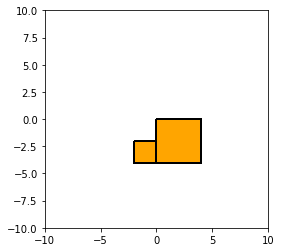

In [6]:
## render two blocks side by side
patch1 = utils.get_patch(s4)
patch2 = utils.get_patch(s2-2)
patches = [patch1,patch2]

utils.render_blockworld(patches)

In [18]:
## distinguish between two blocks merely touching & actually coinciding 
reload(sat)
print sat.separating_axis_theorem(s2[:-1]-2,s4[:-1]) ## 
print sat.apply_sat(s2[:-1]-2,s4[:-1])

True
False


In [ ]:
## sketch of blocklaying procedure:
## sample block size and place in leftmost, lowest position that you can and place in the array
## make sure that no blocks collide
## keep going until the summed area of all blocks equals or exceeds the total area of the arena
## fill these crevices


In [20]:
s4

array([[ 0,  0],
       [ 0, -4],
       [ 4, -4],
       [ 4,  0],
       [ 0,  0]])

In [ ]:
## utils
## write function that takes primitive block and places it in the correct place in the arena 
## (applies the appropriate delta-x, delta-y displacement)

## given vertices, returns four corners

## returns current state of the "floor": 
## deviations from flat that constrain how new blocks can be placed